In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Loading the Dataset into a Pandas DataFrame

In [2]:
tesla_df = pd.read_csv("/Users/Pooja/Desktop/Data Projects/TSLA/Tesla-Stock-Prices-Project/TSLA.csv")

### Data PreProcessing

Previewing the first few records of the tesla_df to note the earliest stock date available.

In [3]:
tesla_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500


Previewing the last few records of the tesla_df to note the latest stock date available.

In [4]:
tesla_df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
3529,3529,2024-07-09,251.000000,265.609985,250.300003,262.329987,160210900
3530,3530,2024-07-10,262.799988,267.589996,257.859985,263.260010,128519400
3531,3531,2024-07-11,263.299988,271.000000,239.649994,241.029999,221707300
3532,3532,2024-07-12,235.800003,251.839996,233.089996,248.229996,155694400
3533,3533,2024-07-15,255.964996,265.579987,251.729996,252.639999,142831728


In [5]:
# Drop the 'Unnamed: 0' column as it is not needed
tesla_df.drop(columns=['Unnamed: 0'], inplace=True)

# Drop duplicates
tesla_df.drop_duplicates()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...,...
3529,2024-07-09,251.000000,265.609985,250.300003,262.329987,160210900
3530,2024-07-10,262.799988,267.589996,257.859985,263.260010,128519400
3531,2024-07-11,263.299988,271.000000,239.649994,241.029999,221707300
3532,2024-07-12,235.800003,251.839996,233.089996,248.229996,155694400


Let's examine the data structure of dataset.

In [6]:
# Print column data type
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3534 non-null   object 
 1   Open    3534 non-null   float64
 2   High    3534 non-null   float64
 3   Low     3534 non-null   float64
 4   Close   3534 non-null   float64
 5   Volume  3534 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 165.8+ KB


Because 'Date' column is an object datatype, convert it into a datetime format

In [7]:
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3534 non-null   datetime64[ns]
 1   Open    3534 non-null   float64       
 2   High    3534 non-null   float64       
 3   Low     3534 non-null   float64       
 4   Close   3534 non-null   float64       
 5   Volume  3534 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 165.8 KB


Financial stock data is time series data. Each stock price is associated with a particular date. To make it easier, 'Date' should be set as an index. This will help in data manipulation, filtering, and sorting. 

Here, we set the 'Date' column as an index.

In [8]:
tesla_df.set_index('Date', inplace=True)

# Sort the DataFrame based on the index in descending order
tesla_df.sort_index(ascending=False, inplace=True)
tesla_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-07-15,255.964996,265.579987,251.729996,252.639999,142831728
2024-07-12,235.800003,251.839996,233.089996,248.229996,155694400
2024-07-11,263.299988,271.000000,239.649994,241.029999,221707300
2024-07-10,262.799988,267.589996,257.859985,263.260010,128519400
2024-07-09,251.000000,265.609985,250.300003,262.329987,160210900


In [9]:
# Display summary statistics
tesla_df.describe()

,Open,High,Low,Close,Volume
count,3534.000000,3534.000000,3534.000000,3534.000000,3.534000e+03
mean,74.997811,76.642865,73.249666,74.985912,9.694511e+07
std,102.281381,104.556354,99.811577,102.217353,7.877581e+07
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06
25%,11.448667,11.753834,11.191166,11.532334,4.749600e+07
50%,17.417334,17.645333,17.064000,17.400333,8.216325e+07
75%,159.177502,161.312500,153.632500,158.180004,1.228650e+08
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08


In [10]:
# Count the missing values
tesla_df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Exploratory Data Analysis 

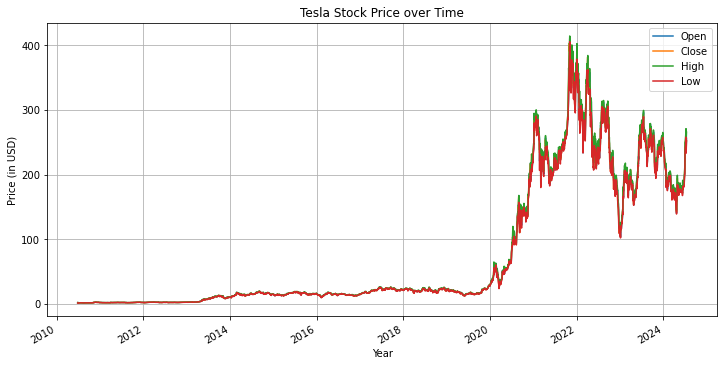

In [11]:
# Plotting the stock price over time - Comparing the Distribution of Open, Close, High, and Low Prices

#plt.plot(tesla_df.index, tesla_df['Open', 'Close'], color='red', linestyle='-', linewidth=1)
tesla_df[['Open', 'Close', 'High', 'Low']].plot(figsize=(12, 6), title="Tesla Stock Price over Time")
plt.xlabel("Year")
plt.ylabel("Price (in USD)")

plt.grid(True)

plt.show()

The plot shows Tesla's stock prices over time, including opening, closing, high, and low values, providing a comprehensive view of its market fluctuations. The stock exhibits a general upward trend, reflecting significant appreciation over the years.

From 2010 to 2019, the stock prices - including open, close, high, and low - indicate a period of slow and steady growth. This period marks Tesla's process of solidifying its presence in the market. However, after 2020, there is a marked acceleration in the stock prices highlighting increased market value. This is indicative of heightened investor interest and innovative products launched increasing value to the electric vehicle sector.

In 2022, the stock experiences considerable peaks and troughs exhibited by the notable volatility likely driven by strong financial results, product launches, or shifts in market dynamics. By 2023, a decline in stock prices is apparent which signify challenges or broader market conditions affecting investor sentiment.

In the current year, 2024, the stock continues to demonstrate dynamic movement between the highs and lows, suggesting investor engagement remains strong amid changing market conditions.

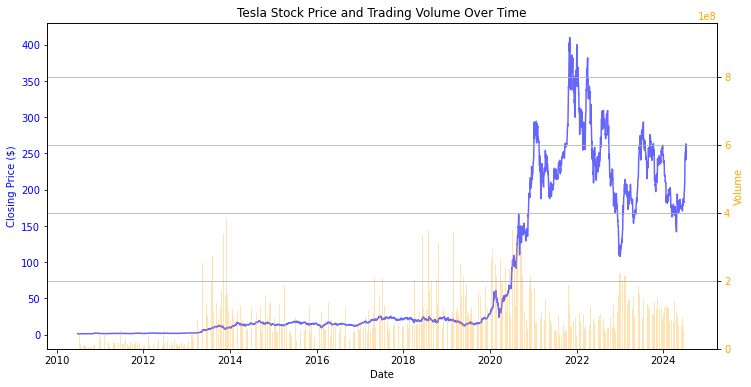

In [23]:
# Volume Trend with Closing Price Overlay

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(tesla_df['Close'], color='blue', label='Close Price', alpha=0.6)
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.bar(tesla_df.index, tesla_df['Volume'], color='orange', alpha=0.3)
ax2.set_ylabel('Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Tesla Stock Price and Trading Volume Over Time')
plt.grid(True)

plt.show()

The graph illustrates the performance of Tesla's stock price and trading volume over time from 2010 to 2024. The blue line represents the stock's closing price, while the orange bars indicate the trading volume.

In the early years, from 2010 until around 2020, Tesla's stock price was relatively stable with only minor fluctuations. It experienced a gradual increase, but the most significant surge occurred around 2020. During this time, the price saw a dramatic rise, peaking sharply. This period of rapid growth reflects a time of increased investor interest, possibly driven by major announcements, changes in market sentiment, or broader industry trends.

The stock's price peak coincides with a substantial increase in trading volume, as shown by the tall orange bars. This suggests that many investors were actively buying or selling shares during this time, likely in response to the stock's movements and market dynamics. The price then shows high volatility between 2020 and 2022, with sharp rises and declines, reflecting fluctuating investor sentiment and rapid market reactions.

After this volatile period, the stock price trends downward, though it continues to fluctuate. It stabilizes at a lower level compared to its peak but still shows some significant movement. Meanwhile, trading volume also decreases after 2022, although there are occasional spikes that align with the price fluctuations. This suggests that while the overall market interest in Tesla's stock diminished from its peak, there were still moments when trading activity surged, likely due to specific events or market reactions.

### Feature Engineering

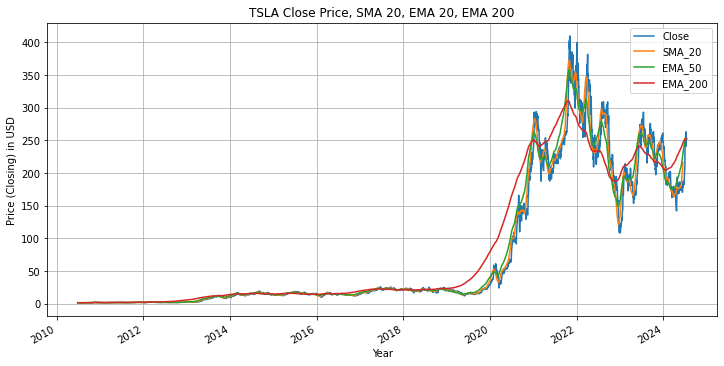

In [12]:
# Comparison of Moving Averages - 20 days, 50 days, and 200 days for Closing Price

# Simple Moving Average - 20 Days
tesla_df['SMA_20'] = tesla_df['Close'].rolling(window=20).mean()

# Exponential Moving Average - 50 days and 200 days
tesla_df['EMA_50'] = tesla_df['Close'].ewm(span=50, adjust=False).mean()
tesla_df['EMA_200'] = tesla_df['Close'].ewm(span=200, adjust=False).mean()

tesla_df[['Close', 'SMA_20', 'EMA_50', 'EMA_200']].plot(figsize=(12,6), title = "TSLA Close Price, SMA 20, EMA 20, EMA 200")

plt.xlabel("Year")
plt.ylabel("Price (Closing) in USD")
plt.grid(True)
plt.show()

The graph above illustrates the closing price of Tesla stock along with three different moving averages: 20 day Simple Moving Average (SMA_20), 50 day Exponential Moving Average (EMA_50), and 200 day Exponential Moving Average (EMA_200). The SMA_20 provides a smoother view of short-term price movements, while EMA_50 is more responsive to recent price changes thus making it useful for identifying medium-term trends. The EMA_200 captures long-term trends to highlight broader market shifts.

Between 2010 and 2019, the stock prices and moving averages are relatively stable showing limited volatility. This changes significantly in 2020 where a strong upward momentum becomes evident as Tesla's stock prices surge. The EMA_200 gradually trends upwards yet lags compared to the shorter moving averages due to a longer calculation period. 

In the years after 2020, there is increated volatility, with shorter-term averages crossing frequently. These frequent crosses indicate significant market events known as "Golden Cross" and "Death Cross". A Golden Cross occurs when a short-term moving average crosses above a long-term moving average. If the 20-day SMA crosses above the 200-day EMA, it suggests that the stock's short-term price trends are gaining strength relative to long-term trends, often prompting traders to consider buying.

A Death Cross happens when a short-term moving average crosses below a long-term moving average. If the 20-day SMA crosses below the 200-day EMA, it suggests that short-term price trends are weakening compared to long-term trends, signaling a potential downward trend and prompting traders to consider selling or adopting a more cautious stance.

Overall, the chart highlights Tesla’s long-term upward trend alongside periods of substantial volatility, particularly after 2020, where the occurrence of Golden Crosses and Death Crosses can provide insights into market behavior and potential trading strategies.

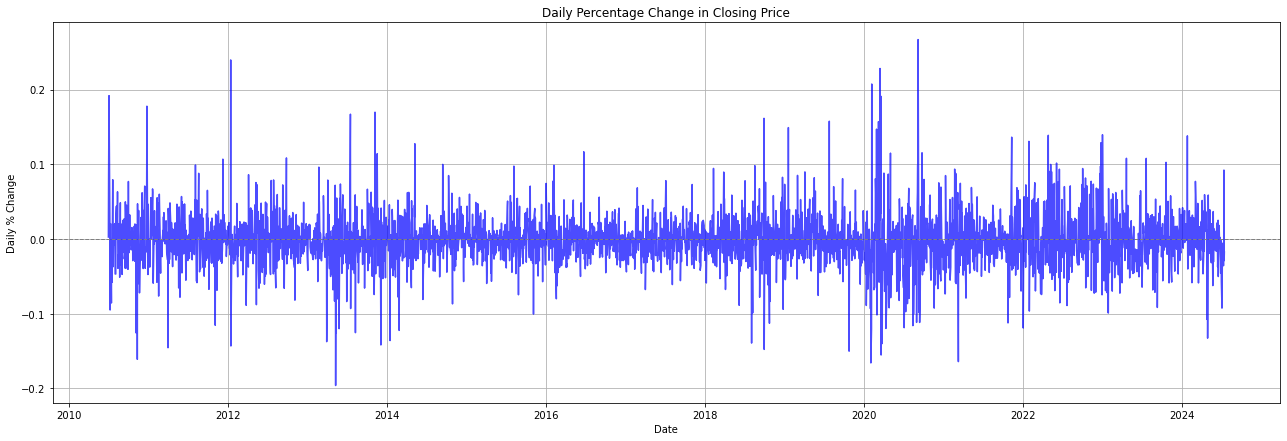

In [38]:
# Daily Returns to understand short-term price fluctuations and building predictive models

tesla_df['Daily Return'] = tesla_df['Close'].pct_change()

plt.figure(figsize=(22, 7))
plt.plot(tesla_df['Daily Return'], color='blue', alpha=0.7, label = 'Daily Percentage Change in Closing Price')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.title("Daily Percentage Change in Closing Price")
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.grid(True)

plt.show()

The graph of Tesla's daily returns provides critical insights into the stock's performance and volatility, calculated as the percentage change in closing prices from one day to the next. This metric is essential for investors seeking to understand the fluctuations and trends in Tesla's stock, especially given its significant market presence from 2010 to 2024.

Days where the line is above the reference line at y=0 indicate positive daily returns suggesting an increase in stock price compared to the previous day. When the line dips below zero, it signals negative returns, indicating the stock price has decreased. 

Observing how frequently and how dramatically the line deviates from the referene line offers insights into Tesla's risk profile and investor sentiment. 

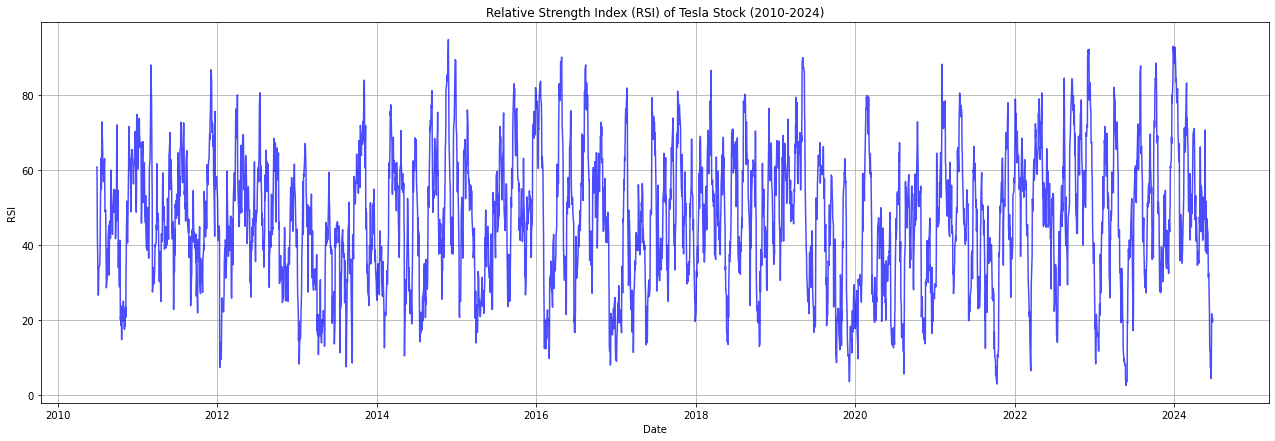

In [42]:
# Relative Strength Index helps predict whether an asset's price will increase or decrease in the future

delta = tesla_df['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
tesla_df['RSI'] = 100 - (100 / (1 + gain / loss))

plt.figure(figsize=(22, 7))
plt.plot(tesla_df['RSI'], color='blue', alpha=0.7, label = 'RSI')
plt.title("Relative Strength Index (RSI) of Tesla Stock (2010-2024)")
plt.xlabel('Date')
plt.ylabel('RSI')
plt.grid(True)

The graph plotted shows the Relative Strength Index (RSI) of Tesla’s stock price from 2010 to 2024. The RSI is a momentum oscillator that ranges from 0 to 100 and is typically used to identify overbought or oversold conditions in a market.

For instance, around early 2021, the RSI spiked above 70, suggesting that Tesla was overbought. This peak coincided with a period of rapid stock price appreciation driven by high investor interest and optimism surrounding the company’s growth and expansion plans. Shortly after this peak, the RSI began to decline, indicating a potential correction in the stock price, which indeed followed as the market recalibrated.

In contrast, during late 2022, the RSI fell below 30, reflecting a significant oversold condition. This decline was likely influenced by broader market concerns, including rising interest rates and a general pullback in tech stocks. This low point in the RSI could have signaled a buying opportunity for investors, as it often indicates that the stock is undervalued relative to its recent performance.

Throughout the years, the RSI graph illustrates not just the volatility of Tesla’s stock, but also key moments that define investor behavior and market dynamics. Each fluctuation in the RSI serves as a reflection of the underlying market forces at play, making it a valuable tool for understanding the broader narrative of Tesla’s performance over this extensive time frame.